In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/worldometer_coronavirus_daily_data.csv')
data.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170917 entries, 0 to 170916
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     170917 non-null  object 
 1   country                  170917 non-null  object 
 2   cumulative_total_cases   170917 non-null  float64
 3   daily_new_cases          161237 non-null  float64
 4   active_cases             161011 non-null  float64
 5   cumulative_total_deaths  164059 non-null  float64
 6   daily_new_deaths         145063 non-null  float64
dtypes: float64(5), object(2)
memory usage: 9.1+ MB


# 연도, 월별 새로운 코로나 신규확진자 수

In [ ]:
year_month = data.date.apply(lambda x : x.split('-')[0]+'-'+x.split('-')[1])
data['year_month'] = year_month

monthly_trend = data.groupby(['country', 'year_month'])['daily_new_cases'].sum()
monthly_trend

country      year_month
Afghanistan  2020-10        2157.0
             2020-11        5073.0
             2020-12        6015.0
             2020-2            0.0
             2020-3          173.0
                            ...   
Zimbabwe     2021-8        15913.0
             2021-9         6047.0
             2022-1        16408.0
             2022-2         6714.0
             2022-3         7632.0
Name: daily_new_cases, Length: 5833, dtype: float64

# 미슐랭 가이드에 있는 나라 조사

### 최근 3개월간의 경향을 조사

- 최근 3개월간의 경향을 조사
- 데이터가 3월 17일까지 있으므로 2021년 12월, 2022년 1월, 2022년 2월을 조사

In [ ]:
michelinCountry = ['Germany', 'United Kingdom', 'Austria', 'China', 'Macao',
       'Hong Kong', 'Spain', 'Japan', 'South Korea', 'Italy',
       'USA', 'Sweden', 'Norway', 'Denmark', 'Singapore',
       'Taiwan', 'Netherlands', 'Switzerland', 'France', 'Belgium',
       'Ireland', 'Thailand', 'Portugal', 'Greece', 'Slovenia',
       'Luxembourg', 'Brazil', 'Malta', 'Andorra', 'San Marino',
       'Czechia', 'Iceland', 'Finland', 'Croatia', 'Hungary', 'Poland',
       'Serbia']

# 미슐랭에 속한 국가들 조사
michelin_data = data[data['country'].isin(michelinCountry)]

In [ ]:
# 최근 3개월 조사
latest_3month_michelin_data = michelin_data.query("year_month=='2021-12' or year_month=='2022-1' or year_month=='2022-2'")
latest_3month_trend = latest_3month_michelin_data.groupby(['country', 'year_month'])['daily_new_cases'].sum().reset_index()
latest_3month_trend


,country,year_month,daily_new_cases
0,Andorra,2021-12,6555.0
1,Andorra,2022-1,12218.0
2,Andorra,2022-2,2041.0
3,Austria,2021-12,118624.0
4,Austria,2022-1,576959.0
...,...,...,...
94,Thailand,2022-1,217107.0
95,Thailand,2022-2,451385.0
96,USA,2021-12,6526037.0
97,USA,2022-1,20434710.0


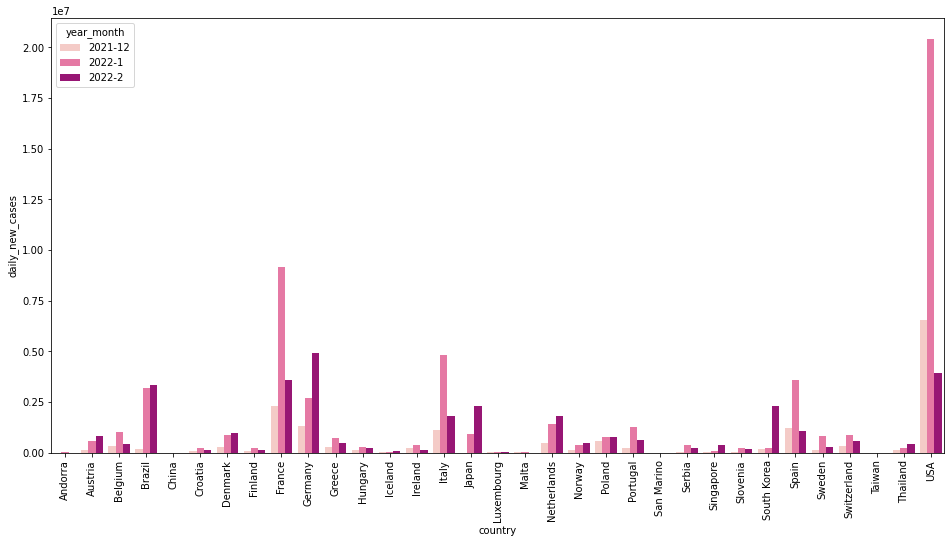

In [ ]:
plt.figure(figsize=(16,8))
sns.set_palette("RdPu", 3)
sns.barplot(data=latest_3month_trend, x='country', y='daily_new_cases', hue='year_month')
plt.xticks(rotation = 90 )
plt.show()

- 위 그래프를 보면 대부분의 나라가 최근 12월->1월->2월에 계속 증가 혹은 증가 후 감소의 경향을 보임
- '최근 코로나가 감소하고 있다.'는 가설을 뒷받침할 유의미한 자료는 아님

### 6개월 전과 현재를 비교
- 2021년 9월과 2022년 2월을 비교

In [ ]:
before_6month_michelin_data = michelin_data.query("year_month=='2021-9' or year_month=='2022-2'")
before_6month_trend = before_6month_michelin_data.groupby(['country', 'year_month'])['daily_new_cases'].sum().reset_index()
before_6month_trend

,country,year_month,daily_new_cases
0,Andorra,2021-9,189.0
1,Andorra,2022-2,2041.0
2,Austria,2021-9,54790.0
3,Austria,2022-2,824164.0
4,Belgium,2021-9,60011.0
...,...,...,...
61,Taiwan,2022-2,1699.0
62,Thailand,2021-9,398746.0
63,Thailand,2022-2,451385.0
64,USA,2021-9,4210812.0


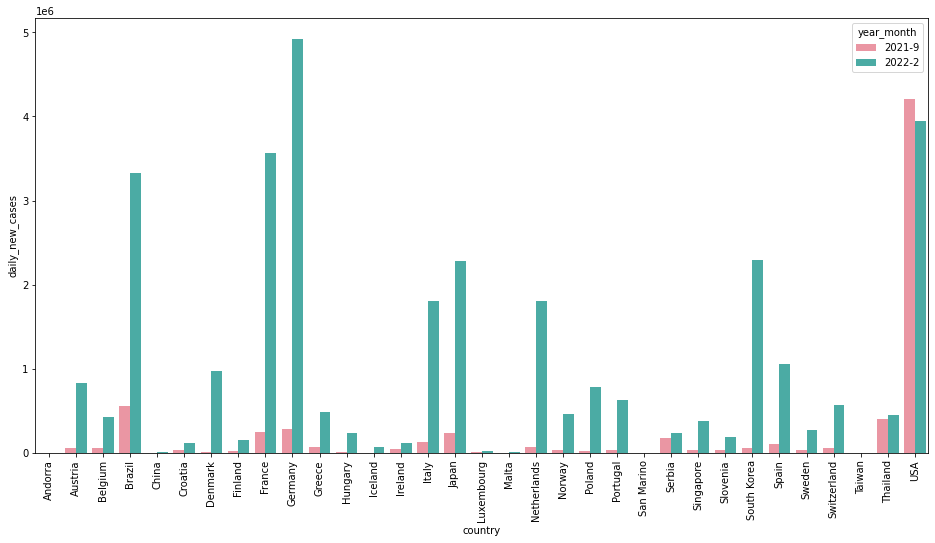

In [ ]:
plt.figure(figsize=(16,8))
sns.set_palette("RdPu", 1)
sns.barplot(data=before_6month_trend, x='country', y='daily_new_cases', hue='year_month')
plt.xticks(rotation = 90 )
plt.show()

- 위 그래프를 보면 미국 제외 모든 나라가 6개월 전과 비교하여 현재 코로나 감염자 수가 늘어난 상황
- '최근 코로나가 감소하고 있다.'는 가설과 반대되는 경향..

### 한달 전과 현재를 비교
- 가장 최근 날짜인 2022년 3월 17일과 한달전인 2022 2월 17일을 비교

In [ ]:
before_1month_michelin_data = michelin_data.query("date=='2022-2-17' or date=='2022-3-17'")
before_1month_michelin_data

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,year_month
3019,2022-2-17,Andorra,37522.0,70.0,743.0,150.0,0.0,2022-2
3047,2022-3-17,Andorra,39234.0,440.0,704.0,153.0,1.0,2022-3
9115,2022-2-17,Austria,2393576.0,30914.0,306438.0,14503.0,32.0,2022-2
9143,2022-3-17,Austria,3335900.0,52045.0,433407.0,15320.0,31.0,2022-3
14449,2022-2-17,Belgium,3473015.0,12714.0,1011825.0,29832.0,54.0,2022-2
...,...,...,...,...,...,...,...,...
151866,2022-3-17,Taiwan,21583.0,91.0,1279.0,853.0,0.0,2022-3
154124,2022-2-17,Thailand,2656411.0,17349.0,144058.0,22541.0,22.0,2022-2
154152,2022-3-17,Thailand,3276098.0,25456.0,225131.0,23998.0,77.0,2022-3
164030,2022-2-17,USA,79973635.0,114292.0,27733834.0,958625.0,2667.0,2022-2


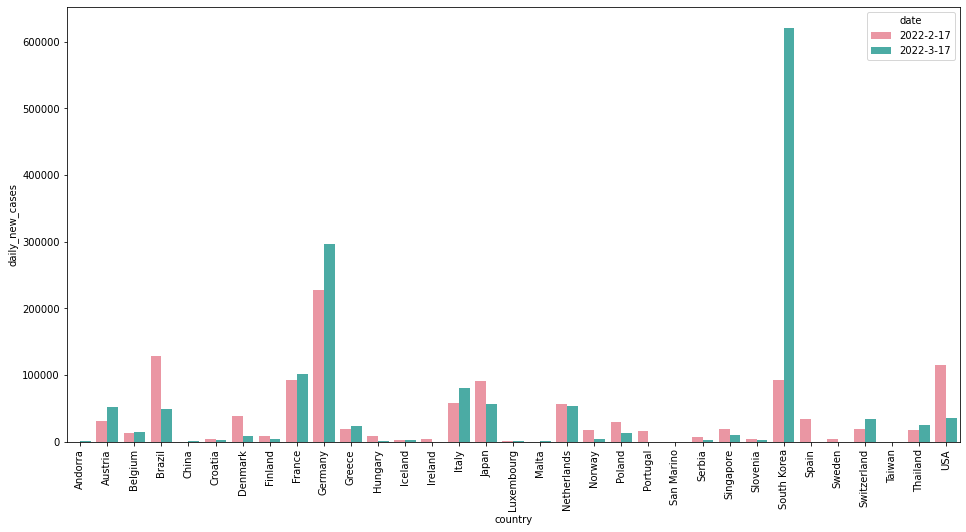

In [ ]:
plt.figure(figsize=(16,8))
sns.set_palette("RdPu", 1)
sns.barplot(data=before_1month_michelin_data, x='country', y='daily_new_cases', hue='date')
plt.xticks(rotation = 90 )
plt.show()

- 위 그래프를 보면 확진자가 감소한 국가들도 있지만 증가한 국가들도 많이 보임
- '최근 코로나가 감소하고 있다.'는 가설을 뒷받침할 유의미한 자료는 아님


데이터가 3월 17일 까지만 있음   
우리나라만해도 최근 4월 들어서야 감소 경향을 보임   
4월 데이터까지 있으면 좋겠음